### Exercise 03.1

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

Riporto le simulazioni Monte Carlo per la Call-option e per la Put-option, ottenute campionando direttamente e in maniera discretizzata il prezzo dell'attività finanziaria. Ho utilizzato $M=5\cdot 10^4$ e $N=100$.

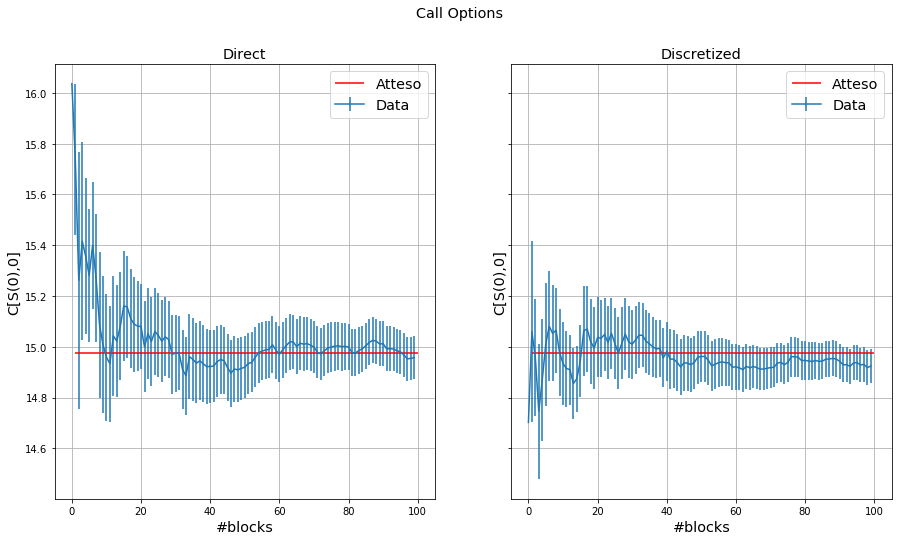

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import math

x, C_0, C_dev_std = np.loadtxt("./es3.1/C_GBM1.txt", usecols=(0,1,2), unpack='true')
x, C_0_d, C_dev_std_d = np.loadtxt("./es3.2/discreto_C_GBM1.txt", usecols=(0,1,2), unpack='true')
x=x/1000

f, axarr = plt.subplots(1,2, sharey=True,figsize=(15,8))

axarr[0].errorbar(x,C_0,yerr=C_dev_std,label="Data")
axarr[0].set_title('Direct',fontsize='x-large')
axarr[0].set_xlabel('#blocks',fontsize='x-large')
axarr[0].set_ylabel('C[S(0),0]',fontsize='x-large')
axarr[0].grid(True)
axarr[0].hlines(y=14.975790778311286,xmin=1, xmax=100, color='r', linestyle='-',label="Atteso")
axarr[0].legend(fontsize='x-large')

axarr[1].errorbar(x,C_0_d,yerr=C_dev_std_d,label="Data")
axarr[1].set_title('Discretized',fontsize='x-large')
axarr[1].set_xlabel('#blocks',fontsize='x-large')
axarr[1].set_ylabel('C[S(0),0]',fontsize='x-large')
axarr[1].grid(True)
axarr[1].hlines(y=14.975790778311286,xmin=1, xmax=100,color='r', linestyle='-',label="Atteso")
axarr[1].legend(fontsize='x-large')
f.suptitle('Call Options',fontsize='x-large')

plt.show()

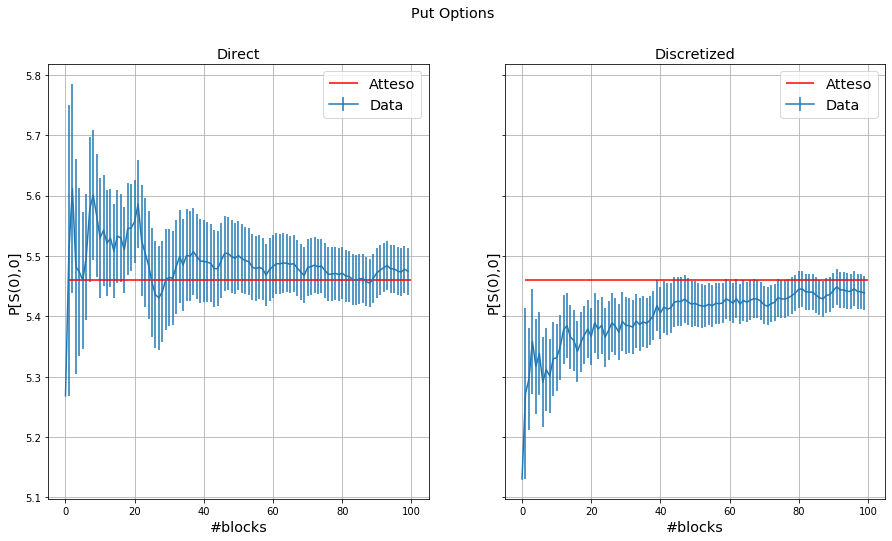

In [3]:
x, P_0, P_dev_std = np.loadtxt("./es3.1/P_GBM1.txt", usecols=(0,1,2), unpack='true')
x, P_0_d, P_dev_std_d = np.loadtxt("./es3.2/discreto_P_GBM1.txt", usecols=(0,1,2), unpack='true')
x=x/1000
f1, axarr1 = plt.subplots(1,2, sharey=True,figsize=(15,8))

axarr1[0].errorbar(x,P_0,yerr=P_dev_std,label="Data")
axarr1[0].set_title('Direct',fontsize='x-large')
axarr1[0].set_xlabel('#blocks',fontsize='x-large')
axarr1[0].set_ylabel('P[S(0),0]',fontsize='x-large')
axarr1[0].grid(True)
axarr1[0].hlines(y=5.4595325819072364,xmin=1, xmax=100, color='r', linestyle='-',label="Atteso")
axarr1[0].legend(fontsize='x-large')


axarr1[1].errorbar(x,P_0_d,yerr=P_dev_std_d,label="Data")
axarr1[1].set_title('Discretized',fontsize='x-large')
axarr1[1].set_xlabel('#blocks',fontsize='x-large')
axarr1[1].set_ylabel('P[S(0),0]',fontsize='x-large')
axarr1[1].grid(True)
axarr1[1].hlines(y=5.4595325819072364,xmin=1, xmax=100,color='r', linestyle='-',label="Atteso")
axarr1[1].legend(fontsize='x-large')
f1.suptitle('Put Options',fontsize='x-large')

plt.show()

Gli andamenti della call-option e della put-option (valutati campionando la $S(t)$ in maniera diretta o discretizzata) tendono, entro l'incertezza statistica, all'aumentare del numero di blocchi al valore atteso stimato di Black-Scholes.

Come abbiamo già detto l'asset price $S(t)$ segue il $\textit{Geometric Brownian Motion}$ ovvero $\log(S(t))$ è un moto browniano con valore iniziale $\log(S(0))$. 
Inoltre dato che gli incrementi di $W$ sono indipendenti e normalmente distribuiti , la semplice procedura di ricorsione per campionare valori discretizzati di $S\sim GBM(\mu,\sigma^2)$ a $t_1 < t_2 < … < t_n$ è:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
    con $Z_i \sim \mathcal{N}(0,1)$ ovvero Gaussiane standard indipendenti.
</p>
Qusto metodo di discretizzazione è esatto e la serie $(S(t_1),\dots,S(t_n))$ che esso produce produce ha una probabilità congiunta $S\sim GBM(\mu,\sigma ^2)$ al tempo $t_1,\dots,t_n$.
</p>
Anche le simulazioni pertanto mostrano che il risultato è lo stesso per un campionamento diretto o discretizzato.